In [1]:
# VISHAL GIRDHAR github.com/girdhar64 Spam classifier using Scikit learn and NLTK (natural language toolkit)
# which contains a library of stopwards used for spam classification

In [25]:
import numpy as np
import pandas as pd
#for visualisation
import matplotlib.pyplot 
import seaborn as sns     

from nltk.corpus import stopwords #nltk is a large dump of natural language 
                                  #datasets,we will use stopwords for spam classifier
import string

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
#confusion matrix & classification report is used to cheak accuracy & precession of classification
from sklearn.feature_extraction.text import CountVectorizer
#The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, 
#but also to encode new documents using that vocabulary.
from sklearn.feature_extraction.text import TfidfTransformer
# Tf means term-frequency while tf-idf means term-frequency times inverse document-frequency
from sklearn.naive_bayes import MultinomialNB
# The multinomial Naive Bayes classifier is suitable for classification with discrete features

In [4]:
# To download the dataset, follow the link :
# https://archive.ics.uci.edu/ml/machine-learning-databases/00228/


In [5]:

no_lines = !wc -l < SMSSpamCollection

In [6]:
no_lines

['5574']

In [7]:
df = pd.DataFrame(index = np.arange(int(no_lines[0])), columns = ["msg", "label"])
# To categorize into columns

In [8]:
df.shape
#our dataset contains 5574 lines and columns "msg" and "labels"

(5574, 2)

In [11]:
with open('SMSSpamCollection', "r") as file:
    for line_no, line in enumerate(file):
        df.loc[line_no]["label"], df.loc[line_no]["msg"] = line.split("\t")
#this splits our dataset between message and labels

In [13]:
#looking into out preprocessed data
df.head()

,msg,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...\n,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [16]:
df["length"] = df["msg"].apply(len)
#this will give length of each individual message


In [17]:
df.head()

,msg,label,length
0,"Go until jurong point, crazy.. Available only ...",ham,112
1,Ok lar... Joking wif u oni...\n,ham,30
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,156
3,U dun say so early hor... U c already then say...,ham,50
4,"Nah I don't think he goes to usf, he lives aro...",ham,62


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7faf31f15890>,
      dtype=object)

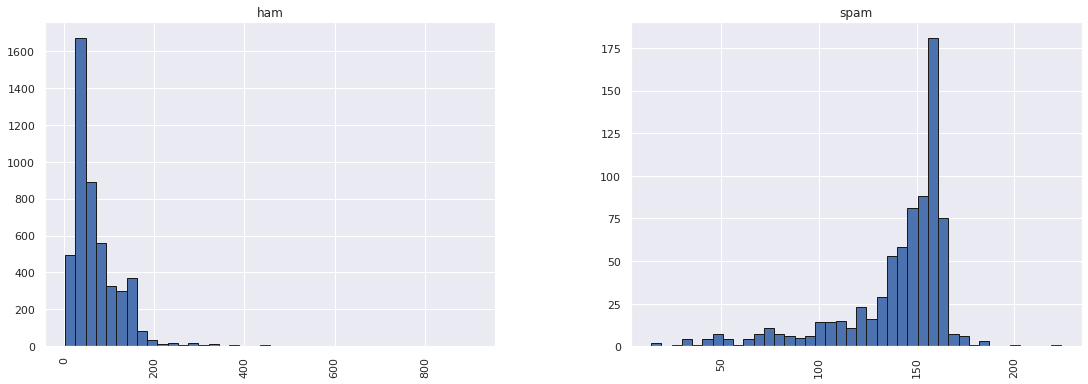

In [19]:
sns.set_style("darkgrid")
sns.set(rc = {'figure.figsize' : (18,6)})
df.hist(column = 'length', by = 'label', bins = 40, edgecolor = 'k')

## Data Preprocessing

We remove punctuation,and make all words lower case

In [21]:

print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [24]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/girdhar64/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
print(stopwords.words("english"))
#we will neglect sentences containing stopwords they are most likely span

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [31]:
msg_train, msg_test, label_train, label_test = train_test_split(df["msg"], df["label"], test_size = 0.3)
#we use 70 percent dataset for training and other 30 percent for testing

In [32]:
sample_msg = "Hello everyone ! this is ,vishal Gi)rdhar.Here i am TYPINg some words to cheak! preprocessing.We need to remove punctuation %and ^make &&words of lower case"

In [33]:

def msg_preprocessing(msg):
    msg = msg.lower()
    msg_char = [c for c in msg if c not in string.punctuation]
    msg = "".join(msg_char)
    final_msg = [word for word in msg.split() if word not in stopwords.words("english") ]
    return final_msg

In [34]:
print(msg_preprocessing(sample_msg))

['hello', 'everyone', 'vishal', 'girdharhere', 'typing', 'words', 'cheak', 'preprocessingwe', 'need', 'remove', 'punctuation', 'make', 'words', 'lower', 'case']


In [35]:
#count vectorize convert number into tokens so that we can train them using our model
%%time
bow_transformer = CountVectorizer(analyzer=msg_preprocessing).fit(msg_train)

CPU times: user 5.1 s, sys: 440 ms, total: 5.54 s
Wall time: 5.82 s


In [36]:
%%time
bow = bow_transformer.transform(msg_train)

CPU times: user 5.22 s, sys: 436 ms, total: 5.66 s
Wall time: 5.7 s


In [37]:

tfidf_transformer = TfidfTransformer().fit(bow)

In [38]:
tfidf = tfidf_transformer.transform(bow)

# Training our model

In [39]:
spam_detect_model = MultinomialNB().fit(tfidf, label_train)

In [41]:
#prediction on train data
train_prediction = spam_detect_model.predict(tfidf)

print(confusion_matrix(label_train, train_prediction))

[[3373    0]
 [ 115  413]]


In [42]:
print(classification_report(label_train, train_prediction))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      3373
        spam       1.00      0.78      0.88       528

    accuracy                           0.97      3901
   macro avg       0.98      0.89      0.93      3901
weighted avg       0.97      0.97      0.97      3901



In [52]:
#accuracy on training data form confusion matrix
(3373+413)/(3373+528)*100

97.05203793899

97.05 accuracy on train data

# Applying on Test Data

In [53]:
test_bow = bow_transformer.transform(msg_test)

test_tfidf = tfidf_transformer.transform(test_bow)

In [54]:
prediction = spam_detect_model.predict(test_tfidf)

print(confusion_matrix(label_test, prediction))

[[1454    0]
 [  55  164]]


In [55]:
print(classification_report(label_test, prediction))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1454
        spam       1.00      0.75      0.86       219

    accuracy                           0.97      1673
   macro avg       0.98      0.87      0.92      1673
weighted avg       0.97      0.97      0.97      1673



In [56]:
(1454+164)/(1454+219)*100

96.71249252839212

96.7 percent accuracy on test data

# IMPORTANT NOTE


How do we get such high accuracy Probably We are ovefitting the data.